Credits to the Experts (Please like their kernels)<br>
Ashish Gupta: [24+ top lgbm models outputs](https://www.kaggle.com/roydatascience/lgmodels)<br>
Konstantin: [ieee-internal-blend](https://www.kaggle.com/kyakovlev/ieee-internal-blend)<br>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

from scipy.stats import describe
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Stacking Approach using GMEAN

In [38]:
LABELS = ["isFraud"]
all_files = glob.glob('./lgmodels/*.csv')
my_all_files = glob.glob('./outputs/prediction_target_enc/*.csv')
scores = np.zeros(len(all_files) + len(my_all_files))
for i in range(len(all_files)):
    scores[i] = float('.'+all_files[i].split(".")[2])
for i in range(len(my_all_files)):
    scores[len(all_files) + i] = float('.' + my_all_files[i].split('_')[4].split('.')[1])

In [25]:
float('.' + my_all_files[0].split('_')[4].split('.')[1])

0.9506

In [39]:
all_files_all = all_files + my_all_files
all_files_all

['./lgmodels/Submission-.9438.csv',
 './lgmodels/Submission-.9429.csv',
 './lgmodels/submission-0.9433.csv',
 './lgmodels/submission-0.9468.csv',
 './lgmodels/submission-.9466.csv',
 './lgmodels/submission-.9473.csv',
 './lgmodels/submission-.9471.csv',
 './lgmodels/submission-.9459.csv',
 './lgmodels/submission-.9474.csv',
 './lgmodels/submission-.9460.csv',
 './lgmodels/submission-.9449.csv',
 './lgmodels/submission-.9463.csv',
 './lgmodels/submission-0.9475.csv',
 './lgmodels/submission-.9485.csv',
 './lgmodels/submission-.9452.csv',
 './lgmodels/submission-.9451.csv',
 './lgmodels/submission-0.9467.csv',
 './lgmodels/submission-.9469.csv',
 './lgmodels/submission_.9452.csv',
 './lgmodels/Submission-.9440.csv',
 './lgmodels/submission-.9454.csv',
 './lgmodels/submission-0.9466.csv',
 './lgmodels/Submission-.9442.csv',
 './lgmodels/submission-.9480.csv',
 './lgmodels/submission-.9457.csv',
 './lgmodels/Submission-.9433.csv',
 './lgmodels/submission-.9408.csv',
 './outputs/prediction_

In [40]:
top = scores.argsort()[::-1]
for i, f in enumerate(top):
    #print(i,scores[f],all_files[f])
    print(i,scores[f],all_files_all[f])

0 0.9532 ./outputs/prediction_target_enc/kernel_best_0.9532.csv
1 0.9506 ./outputs/prediction_target_enc/simple_ensemble6_0.9506.csv
2 0.9485 ./lgmodels/submission-.9485.csv
3 0.948 ./lgmodels/submission-.9480.csv
4 0.9475 ./lgmodels/submission-0.9475.csv
5 0.9474 ./lgmodels/submission-.9474.csv
6 0.9473 ./lgmodels/submission-.9473.csv
7 0.9471 ./lgmodels/submission-.9471.csv
8 0.9469 ./lgmodels/submission-.9469.csv
9 0.9468 ./lgmodels/submission-0.9468.csv
10 0.9467 ./lgmodels/submission-0.9467.csv
11 0.9466 ./lgmodels/submission-0.9466.csv
12 0.9466 ./lgmodels/submission-.9466.csv
13 0.9463 ./lgmodels/submission-.9463.csv
14 0.946 ./lgmodels/submission-.9460.csv
15 0.9459 ./lgmodels/submission-.9459.csv
16 0.9457 ./lgmodels/submission-.9457.csv
17 0.9454 ./lgmodels/submission-.9454.csv
18 0.9452 ./lgmodels/submission_.9452.csv
19 0.9452 ./lgmodels/submission-.9452.csv
20 0.9451 ./lgmodels/submission-.9451.csv
21 0.9449 ./lgmodels/submission-.9449.csv
22 0.9442 ./lgmodels/Submission-.

In [41]:
#outs = [pd.read_csv(all_files[f], index_col=0) for f in top]
outs = [pd.read_csv(all_files_all[f], index_col=0) for f in top]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "m" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols

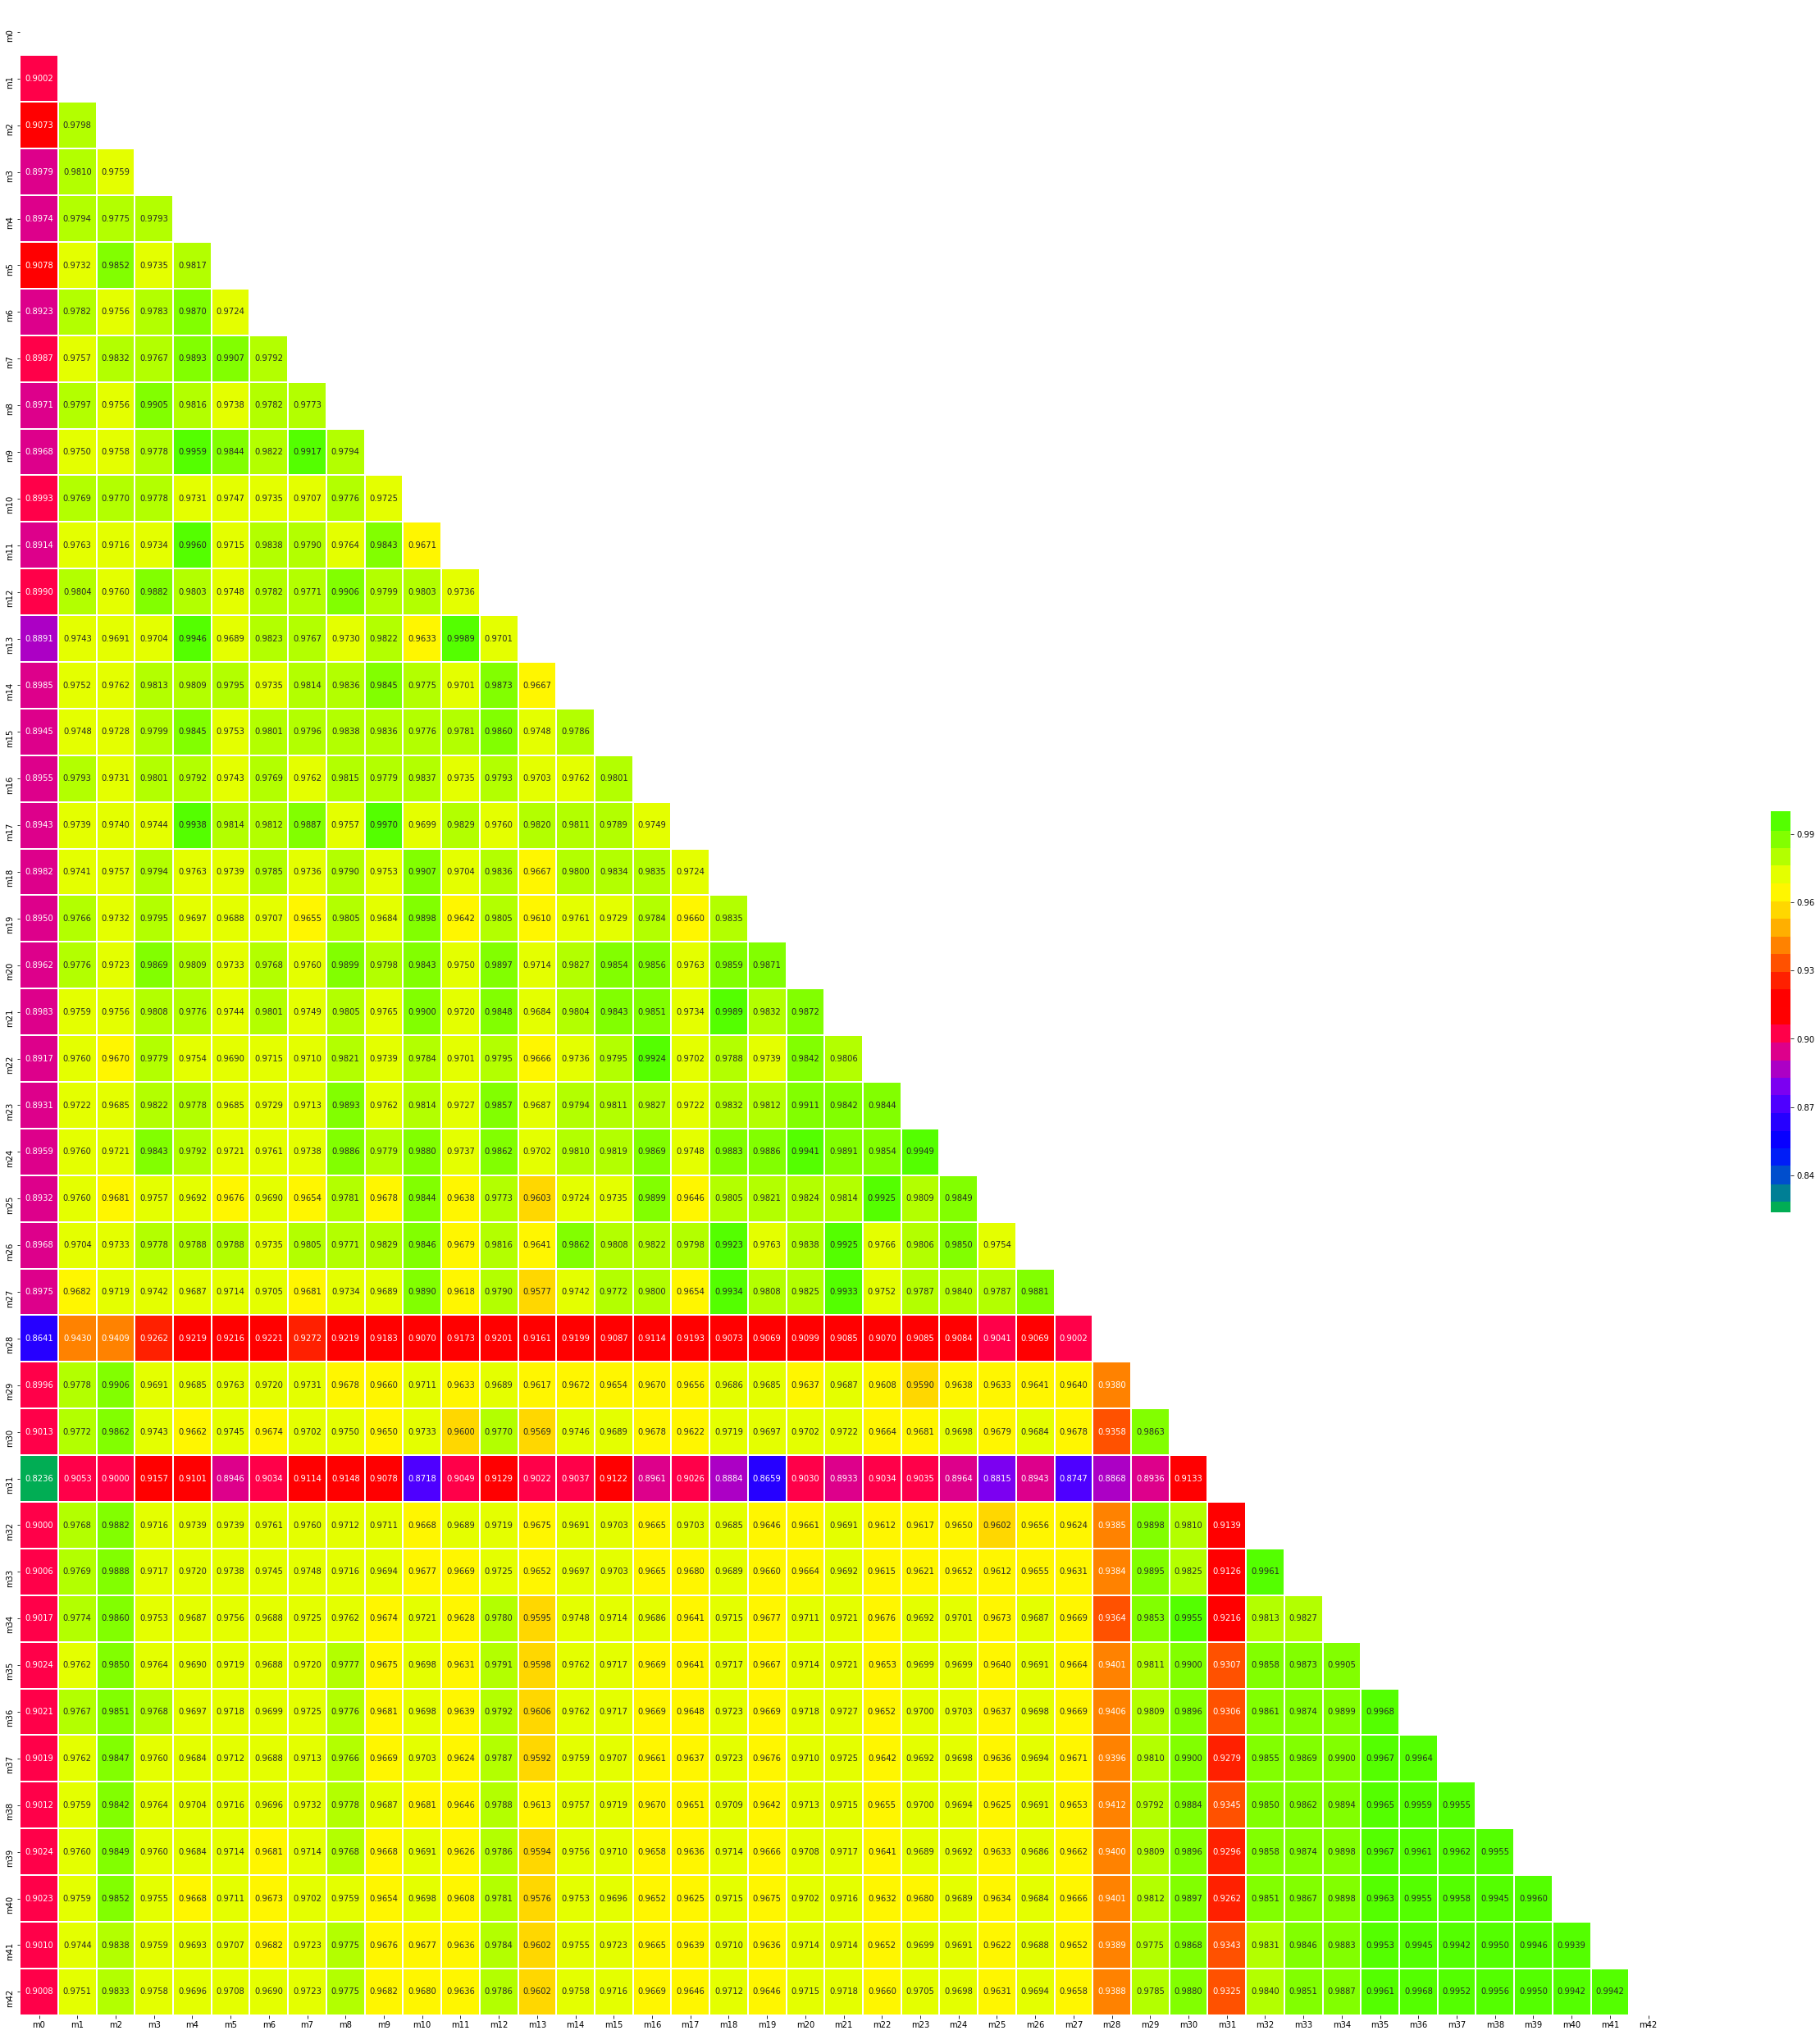

In [42]:
# check correlation
corr = concat_sub.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(len(cols)+2, len(cols)+2))

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr,mask=mask,cmap='prism',center=0, linewidths=1,
                annot=True,fmt='.4f', cbar_kws={"shrink":.2})

# Select models with low average correlation

In [43]:
mean_corr = corr.mean()
mean_corr = mean_corr.sort_values(ascending=True)
mean_corr = mean_corr[:6]
mean_corr

m0     0.898089
m31    0.906643
m28    0.922976
m13    0.964399
m25    0.966661
m11    0.967168
dtype: float64

# GMEAN of models with low average correlation

In [44]:
m_gmean1 = 0
for n in mean_corr.index:
    m_gmean1 += np.log(concat_sub[n])
m_gmean1 = np.exp(m_gmean1/len(mean_corr))

# Weighted GMEAN by inverse correlation

In [45]:
rank = np.tril(corr.values,-1)
rank[rank<0.92] = 1
m = (rank>0).sum() - (rank>0.97).sum()
m_gmean2, s = 0, 0
for n in range(m):
    mx = np.unravel_index(rank.argmin(), rank.shape)
    w = (m-n)/m
    m_gmean2 += w*(np.log(concat_sub.iloc[:,mx[0]])+np.log(concat_sub.iloc[:,mx[1]]))/2
    s += w
    rank[mx] = 1
m_gmean2 = np.exp(m_gmean2/s)

# Top Blends weighted by score
Based on: https://www.kaggle.com/muhakabartay/0-8518-what-proper-weights-give-ieee-int-blend

In [46]:
m

266

In [47]:
top_mean = 0
s = 0
for n in [0, 1, 2, 3, 10, 13, 28, 30]:
    top_mean += concat_sub.iloc[:,n]*scores[top[n]]
    s += scores[top[n]]
top_mean /= s

# GMEAN Final Stacking

In [48]:
m_gmean = np.exp(0.3*np.log(m_gmean1) + 0.2*np.log(m_gmean2) + 0.5*np.log(top_mean))
describe(m_gmean)

DescribeResult(nobs=506691, minmax=(0.0, 0.9894753105003091), mean=0.025825800207648866, variance=0.012247532725937973, skewness=7.057819499030822, kurtosis=51.8569946005139)

In [13]:
import datetime
today = str(datetime.date.today())

In [49]:
concat_sub['isFraud'] = m_gmean
concat_sub[['isFraud']].to_csv(f'./outputs/ensemble/stack_gmean_{today}_3.csv')

In [52]:
df1 = pd.read_csv('./outputs/prediction_target_enc/kernel_best_0.9532.csv')
df2 = pd.read_csv('./outputs/ensemble/stack_gmean_2019-10-04_2.csv')
df1['isFraud'] = 0.7 * df1['isFraud'] + 0.3 * df2['isFraud']
df1.head()

,TransactionID,isFraud
0,3663549,0.000662
1,3663550,0.001756
2,3663551,0.001186
3,3663552,0.000980
4,3663553,0.001326


In [54]:
df1.to_csv(f'./outputs/ensemble/blending_{today}.csv', index=False)